**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Open the Dataset**

In [2]:
tweets = pd.read_csv("C:/Users/Samson/Documents/Notebook/Twitter Sentiment Analysis/Datasets/twitter_train.csv")
tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# Data Wrangling

**Checking for any duplicate tweets (Through the Tweet ID)**

In [3]:
tweets.duplicated(subset=['id']).sum()

0

**Checking for any blanks**

In [4]:
tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**Dropping the ID Column**

In [5]:
tweets.drop(['id'], axis = 1, inplace = True)
tweets.columns

Index(['label', 'tweet'], dtype='object')

**Characters Count**

In [6]:
tweets['char_count']= tweets['tweet'].apply(len)
tweets.head()

,label,tweet,char_count
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


**Words Count**

In [7]:
tweets['word_count']= tweets['tweet'].apply(lambda x:len(x.split()) )
tweets.head()

,label,tweet,char_count,word_count
0,0,@user when a father is dysfunctional and is s...,102,18
1,0,@user @user thanks for #lyft credit i can't us...,122,19
2,0,bihday your majesty,21,3
3,0,#model i love u take with u all the time in ...,86,14
4,0,factsguide: society now #motivation,39,4


**Average Characters Count**

In [8]:
tweets['avg_word']= tweets['tweet'].apply(lambda x: len(x)/ len(x.split()))
tweets.head()

,label,tweet,char_count,word_count,avg_word
0,0,@user when a father is dysfunctional and is s...,102,18,5.666667
1,0,@user @user thanks for #lyft credit i can't us...,122,19,6.421053
2,0,bihday your majesty,21,3,7.000000
3,0,#model i love u take with u all the time in ...,86,14,6.142857
4,0,factsguide: society now #motivation,39,4,9.750000


**Number of Hastags Being Used**

In [9]:
def hashtag(text):
    text = len([x for x in text.split() if text.startswith ("#")])
    return text

tweets['hashtag_num']= tweets['tweet'].apply(hashtag)
tweets.head()

,label,tweet,char_count,word_count,avg_word,hashtag_num
0,0,@user when a father is dysfunctional and is s...,102,18,5.666667,0
1,0,@user @user thanks for #lyft credit i can't us...,122,19,6.421053,0
2,0,bihday your majesty,21,3,7.000000,0
3,0,#model i love u take with u all the time in ...,86,14,6.142857,14
4,0,factsguide: society now #motivation,39,4,9.750000,0


**Sentiment Analysis (Polarity & Subjectivity)**

In [10]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets['subjectivity'] = tweets['tweet'].apply(getSubjectivity)
tweets['polarity'] = tweets['tweet'].apply(getPolarity)

tweets.head()

,label,tweet,char_count,word_count,avg_word,hashtag_num,subjectivity,polarity
0,0,@user when a father is dysfunctional and is s...,102,18,5.666667,0,1.0,-0.500000
1,0,@user @user thanks for #lyft credit i can't us...,122,19,6.421053,0,0.2,0.200000
2,0,bihday your majesty,21,3,7.000000,0,0.0,0.000000
3,0,#model i love u take with u all the time in ...,86,14,6.142857,14,0.6,0.976562
4,0,factsguide: society now #motivation,39,4,9.750000,0,0.0,0.000000


# Data Analysis (Part 1)

**Summary of the Tweets Datasets**

In [11]:
tweets.describe()

,label,char_count,word_count,avg_word,hashtag_num,subjectivity,polarity
count,31962.000000,31962.000000,31962.00000,31962.000000,31962.000000,31962.000000,31962.000000
mean,0.070146,84.739628,13.15872,6.778732,1.138352,0.399862,0.168591
std,0.255397,29.455749,5.47815,1.990603,4.061494,0.340470,0.348244
min,0.000000,11.000000,3.00000,2.000000,0.000000,0.000000,-1.000000
25%,0.000000,63.000000,9.00000,5.666667,0.000000,0.000000,0.000000
50%,0.000000,88.000000,13.00000,6.363636,0.000000,0.425000,0.000000
75%,0.000000,108.000000,17.00000,7.428571,0.000000,0.650000,0.400000
max,1.000000,274.000000,34.00000,82.333333,31.000000,1.000000,1.000000


**Tweets Distribution**

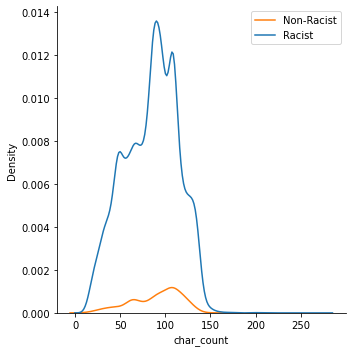

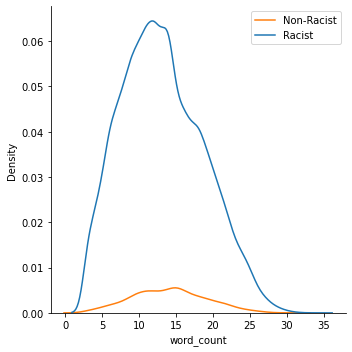

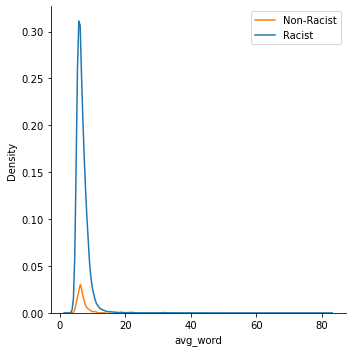

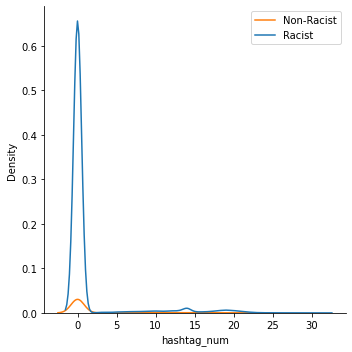

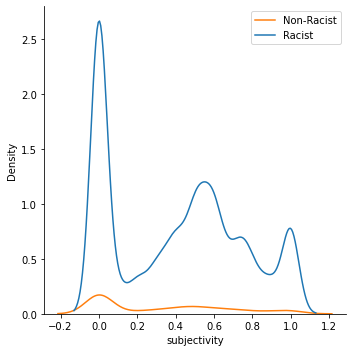

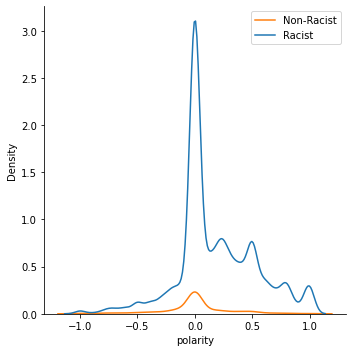

In [12]:
for column_header in list(tweets.columns.values[2:]):
    sns.displot(x = column_header, data = tweets, hue="label", kind="kde", legend = False)
    plt.legend(labels=['Non-Racist', 'Racist'])
    plt.show()

**Number of Racist/Sexist (1) & Non-Racist/Sexist (0) Tweets**

<AxesSubplot:ylabel='label'>

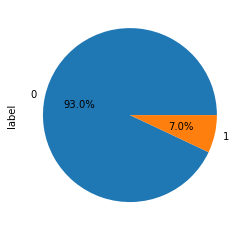

In [13]:
num = tweets['label'].value_counts()
num.plot.pie(autopct = '%1.1f%%')

**Popular Hashtags**

Non-Racist

In [14]:
tweets[tweets['label'] == 0]['tweet'].str.extractall(r'(\#\w+)').value_counts()[:10]

#love           1531
#positive        874
#healthy         570
#smile           548
#thankful        491
#fun             434
#life            405
#summer          367
#model           364
#affirmation     363
dtype: int64

Racist

In [15]:
tweets[tweets['label'] == 1]['tweet'].str.extractall(r'(\#\w+)').value_counts()[:10]

#trump        133
#politics      94
#allahsoil     92
#libtard       76
#liberal       75
#sjw           74
#retweet       57
#black         44
#miamiâ        38
#tampa         32
dtype: int64

**Relationship bewteen Polarity and Subjectivity**

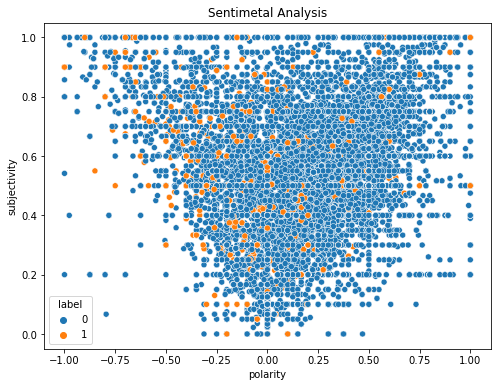

In [16]:
plt.figure(figsize=(8,6))

sns.scatterplot(x ="polarity", y = "subjectivity", hue = "label", data = tweets)

plt.title('Sentimetal Analysis')
plt.show()

# Data Cleaning

**Import Packages**

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**Tweets Cleanning**

In [18]:
def cleaning(text):
    #Remove @user
    text = re.sub('@[A-Za-z0-9]+', '', text)
    
    #Remove Non-Alphanumeric Characters
    text = re.sub("[^A-Za-z0-9]"," ", text)
    
    #Remove Stopwords
    text= [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    #Lemmatizer
    wn = WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in text]
    
    #Convert lists to string
    text = " ".join(text)
    
    return text

In [19]:
tweets['cleanned_tweet'] = tweets['tweet'].apply(cleaning)
tweets

,label,tweet,char_count,word_count,avg_word,hashtag_num,subjectivity,polarity,cleanned_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,5.666667,0,1.0,-0.500000,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,6.421053,0,0.2,0.200000,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,21,3,7.000000,0,0.0,0.000000,bihday majesty
3,0,#model i love u take with u all the time in ...,86,14,6.142857,14,0.6,0.976562,model love u take u time ur
4,0,factsguide: society now #motivation,39,4,9.750000,0,0.0,0.000000,factsguide society motivation
...,...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,13.600000,0,0.0,0.000000,ate isz youuu
31958,0,to see nina turner on the airwaves trying to...,131,23,5.695652,0,0.5,0.400000,see nina turner airwave trying wrap mantle gen...
31959,0,listening to sad songs on a monday morning otw...,63,13,4.846154,0,1.0,-0.500000,listening sad song monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,6.700000,0,0.0,0.000000,sikh temple vandalised calgary wso condemns act


# Data Analysis (Part 2)

**Splitting the dataset into Racist/Sexist and Non-Racist/Sexist Tweets**

In [20]:
positive = tweets[tweets['label'] == 0]
negative = tweets[tweets['label']== 1]

In [21]:
positive.head()

,label,tweet,char_count,word_count,avg_word,hashtag_num,subjectivity,polarity,cleanned_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,5.666667,0,1.0,-0.500000,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,6.421053,0,0.2,0.200000,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,21,3,7.000000,0,0.0,0.000000,bihday majesty
3,0,#model i love u take with u all the time in ...,86,14,6.142857,14,0.6,0.976562,model love u take u time ur
4,0,factsguide: society now #motivation,39,4,9.750000,0,0.0,0.000000,factsguide society motivation


In [22]:
negative.head()

,label,tweet,char_count,word_count,avg_word,hashtag_num,subjectivity,polarity,cleanned_tweet
13,1,@user #cnn calls #michigan middle school 'buil...,74,12,6.166667,0,0.0,0.000,cnn call michigan middle school build wall cha...
14,1,no comment! in #australia #opkillingbay #se...,101,9,11.222222,0,0.0,0.000,comment australia opkillingbay seashepherd hel...
17,1,retweet if you agree!,22,4,5.500000,0,0.0,0.000,retweet agree
23,1,@user @user lumpy says i am a . prove it lumpy.,47,11,4.272727,0,0.0,0.000,lumpy say prove lumpy
34,1,it's unbelievable that in the 21st century we'...,104,15,6.933333,0,0.5,-0.125,unbelievable 21st century need something like ...


**Combining all the tweets into one string**

Racist Tweet

In [23]:
wordslist = []

for text in negative['cleanned_tweet']:
    wordslist.append(text)

racist = " ".join(wordslist)

Non-Racist Tweet

In [24]:
wordslist = []

for text in positive['cleanned_tweet']:
    wordslist.append(text)

non_racist = " ".join(wordslist)

**WordClouds**

Racist Tweets

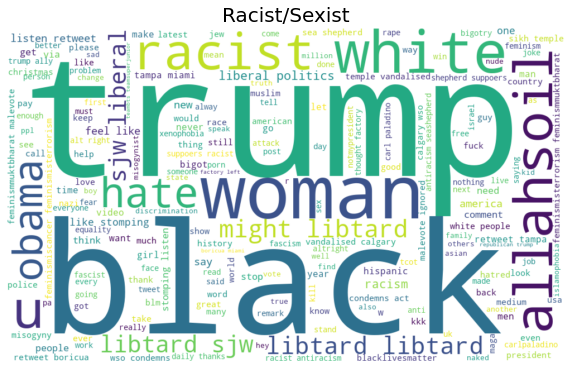

In [25]:
from wordcloud import WordCloud

removed_words = ["amp"]

wc = WordCloud(background_color = 'white',stopwords = removed_words, height = 600, width = 1000)

wc.generate(racist)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Racist/Sexist", fontsize= 20)
plt.axis('off')
plt.show()

Non-Racist Tweets

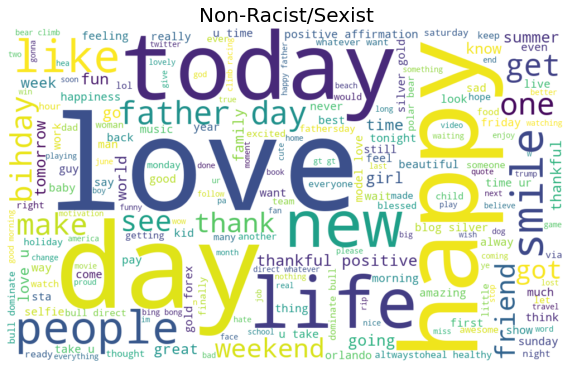

In [26]:
removed_words = ['amp']

wc = WordCloud(background_color = 'white', stopwords = removed_words, height = 600, width = 1000)

wc.generate(non_racist)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Non-Racist/Sexist", fontsize= 20)
plt.axis('off')
plt.show()

**Frequency of Words**

Non-Racist

In [27]:
freq = pd.Series(' '.join(positive['cleanned_tweet']).split()).value_counts()
freq

love           2840
day            2838
happy          1694
u              1621
amp            1476
               ... 
chefstalk         1
pottery           1
outlined          1
yammy             1
alphabounce       1
Length: 34726, dtype: int64

Racist

In [28]:
freq = pd.Series(' '.join(negative['cleanned_tweet']).split()).value_counts()
freq

amp                   300
trump                 217
white                 156
libtard               149
black                 149
                     ... 
straght                 1
trampled                1
reproductiverights      1
regas                   1
mccain                  1
Length: 5370, dtype: int64

**Bigram (Common 2 Words)**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Non-Racist

In [30]:
common_words = get_top_n_bigram(positive['cleanned_tweet'], 10)

bigram_positive = pd.DataFrame(common_words, columns = ['Bigram (Positive)' ,'Count'])
bigram_positive

,Bigram (Positive),Count
0,father day,675
1,thankful positive,429
2,positive affirmation,352
3,take time,336
4,model love,326
5,love take,325
6,time ur,325
7,blog silver,296
8,silver gold,285
9,gold forex,263


Racist

In [31]:
common_words = get_top_n_bigram(negative['cleanned_tweet'], 10)

bigram_negative = pd.DataFrame(common_words, columns = ['Bigram (Negative)' ,'Count'])
bigram_negative

,Bigram (Negative),Count
0,might libtard,72
1,libtard libtard,72
2,libtard sjw,72
3,sjw liberal,72
4,liberal politics,72
5,feel like,51
6,listen retweet,51
7,amp feel,49
8,like stomping,46
9,stomping listen,43


# Model Building

**Count Vectorization**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer()
cv = vectorizer.fit_transform(tweets['cleanned_tweet']).toarray()
cv_df = pd.DataFrame(cv)
cv_df

,0,1,2,3,4,5,6,7,8,9,...,36606,36607,36608,36609,36610,36611,36612,36613,36614,36615
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Spliting into X and Y**

In [34]:
X = cv
Y = tweets["label"].values

**Model Training**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

**Model Testing**

1) Naive Bayes

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, Y_train)
pred_nb = nb.predict(X_test)

print(classification_report(Y_test, pred_nb))
print(confusion_matrix(Y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5942
           1       0.61      0.58      0.60       451

    accuracy                           0.94      6393
   macro avg       0.79      0.78      0.78      6393
weighted avg       0.94      0.94      0.94      6393

[[5777  165]
 [ 189  262]]


2) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

print(classification_report(Y_test, pred_lr))
print(confusion_matrix(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5942
           1       0.86      0.54      0.66       451

    accuracy                           0.96      6393
   macro avg       0.91      0.76      0.82      6393
weighted avg       0.96      0.96      0.96      6393

[[5901   41]
 [ 209  242]]


Logistic Regression has a higher accuracy score

# Applying the Model

**Open the Test Dataset**

In [38]:
test = pd.read_csv("C:/Users/Samson/Documents/Notebook/Twitter Sentiment Analysis/Datasets/twitter_test.csv")
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


**Clean the Dataset**

In [39]:
test['cleanned_tweet'] = test['tweet'].apply(cleaning)
test

,id,tweet,cleanned_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new bird m...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation trump ...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid hairflip neverready forma...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today ohio omg amp used wor...
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...


**Model Prediction**

In [40]:
cv_test = vectorizer.transform(test['cleanned_tweet']).toarray()
Y_pred = lr.predict(cv_test)

**Prediction Results**

In [41]:
test["result"] = Y_pred
test

,id,tweet,cleanned_tweet,result
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new bird m...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,0
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...,0
...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation trump ...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid hairflip neverready forma...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today ohio omg amp used wor...,0
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...,0


**Racist/Sexist Tweets (Result = 1)**

In [42]:
test[test['result']==1]

,id,tweet,cleanned_tweet,result
19,31982,thought factory: bbc neutrality on right wing ...,thought factory bbc neutrality right wing fasc...,1
26,31989,chick gets fucked hottest naked lady,chick get fucked hottest naked lady,1
33,31996,suppo the #taiji fisherman! no bullying! no ra...,suppo taiji fisherman bullying racism tweet4ta...,1
110,32073,hey @user - a $14000 ivanka bracelet? do you f...,hey 14000 ivanka bracelet feel good profiting ...,1
141,32104,you might be a libtard if... #libtard #sjw #l...,might libtard libtard sjw liberal politics,1
...,...,...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism...,uk government new anti semitism definition con...,1
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm...,grew fucked fucked believing better place fucking,1
17176,49139,@user @user are the most racist pay ever!!!!!,racist pay ever,1
17188,49151,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style ...,1


**Non-Racist/Sexist Tweets (Result = 0)**

In [43]:
test[test['result']==0]

,id,tweet,cleanned_tweet,result
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new bird m...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,0
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...,0
...,...,...,...,...
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2 damn tuff ruff muff techno city ng005 web 19...,0
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid hairflip neverready forma...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today ohio omg amp used wor...,0
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...,0


**Saving the Results**

In [44]:
test.to_csv("twitter_test_results.csv", index = False)